In [1]:
import sys
sys.path.append('..')
from utils.visualization import plot_top_counter_train
from utils.another import get_decoding
import psycopg2

C:\Users\persi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
conn = psycopg2.connect(host="localhost", database="postgres", user="postgres", password="igsvemina1201")
cur = conn.cursor()

In [3]:
query0 = '''
    SELECT count(*) from tagged_unigram_counter_sw
    '''
cur.execute(query0)
print(f'number of all unigram in train corpus: {cur.fetchone()[0]}')

number of all unigram in train corpus: 3207615


# POS-TAG analysis

In [4]:
query1 = "SELECT first_tag, sum(tagged_unigram_count) as tag_count \
    FROM tagged_unigram_counter_sw \
    GROUP BY first_tag \
    ORDER BY tag_count DESC \
    LIMIT %(n_most_common)s;"

query2 = "SELECT first_gram, tagged_unigram_count \
    FROM tagged_unigram_counter_sw \
    WHERE first_tag = %(first_tag)s \
    ORDER BY tagged_unigram_count DESC \
    LIMIT %(n_most_common)s;"

In [21]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
def plot_top_counter_train(top, n=1):
    x, y = zip(*map(lambda x: (', '.join(x[:-1]),x[-1]), top))
    plt.figure(figsize=[10,10])
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    sns.barplot(x=list(y),y=list(x))

VBD, Verb, past tense
NN, Noun, singular or mass
CD, Cardinal number
RB, Adverb
NNS, Noun, plural
VBN, Verb, past participle
JJ, Adjective
VBG, Verb, gerund or present participle
VBP, Verb, non-3rd person singular present
POS, Possessive ending


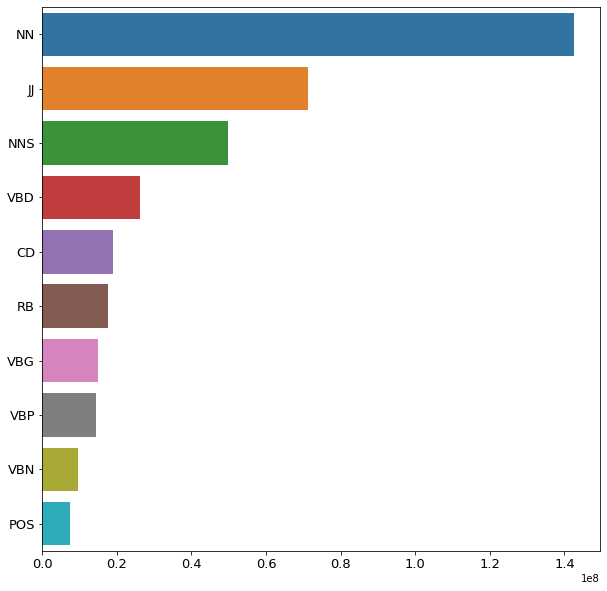

In [31]:
cur.execute(query1,{'n_most_common':10})
most_common_tags = cur.fetchall()
tags, _ = zip(*most_common_tags)
decoded_tags = get_decoding(set(tags))
for tag in decoded_tags:
    print(tag)
plot_top_counter_train(most_common_tags)

In [6]:
for tag in most_common_tags:
    cur.execute(query2, {'first_tag':tag[0],'n_most_common':10})
    most_common_ngrams = cur.fetchall()
    print(f' MOST COMMON NGRAM FOR TAG', *tag[:-1])
    for ngram in most_common_ngrams:
        print(ngram)
#         plot_top_counter_train(most_common_ngrams)

 MOST COMMON NGRAM FOR TAG NN
('year', 1140885)
('time', 853095)
('government', 769131)
('world', 665798)
('president', 624773)
('percent', 608898)
('company', 565773)
('state', 550085)
('week', 521849)
('home', 476024)
 MOST COMMON NGRAM FOR TAG JJ
('new', 1488393)
('last', 1077879)
('many', 620610)
('first', 583761)
('u.s.', 580431)
('former', 389800)
('second', 380654)
('national', 376346)
('public', 362478)
('american', 344591)
 MOST COMMON NGRAM FOR TAG NNS
('people', 1101738)
('years', 874186)
('officials', 388334)
('states', 372586)
('children', 333356)
('months', 330192)
('days', 296007)
('times', 284856)
('points', 257326)
('women', 252284)
 MOST COMMON NGRAM FOR TAG VBD
('said', 4309374)
('told', 419213)
('made', 343086)
('found', 273446)
('reported', 265163)
('took', 262585)
('came', 255636)
('left', 255443)
('went', 201202)
('added', 190095)
 MOST COMMON NGRAM FOR TAG CD
('one', 1457459)
('two', 1119500)
('million', 672639)
('three', 631484)
('four', 382520)
('billion', 359

In [10]:
conn.commit()
cur.close()